**Introduction to Keras using a TensorFlow 2.0 Backend**

**Training a Simple CNN on the MNIST Dataset - Handwrittent Digits**

The key steps covered include:

Loading the MNIST dataset
Inspecting the dataset
Visualizing the image dataset
Preprocessing the dataset
Constructing the model
Training the model
Plotting the training logs
Saving and loading the model
Testing the model on the test data

In [1]:
!pip install tensorflow


# Importing necessary libraries for working with the MNIST dataset using TensorFlow and Keras
from tensorflow.keras.datasets import mnist

# Loading the MNIST dataset and splitting it into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Explanation:
# - The `mnist.load_data()` function is part of the Keras library and is used to fetch the MNIST dataset.
# - The dataset consists of 28x28 pixel grayscale images of handwritten digits (0 through 9).
# - The training set (`x_train` and `y_train`) is used for training the model.
# - The testing set (`x_test` and `y_test`) is used to evaluate the model's performance on unseen data.
# - `x_train` and `x_test` contain the image data, and `y_train` and `y_test` contain the corresponding labels.


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# Information about the MNIST dataset

# Printing the initial shape or dimensions of x_train
print("Initial shape or dimensions of x_train:", str(x_train.shape))

# Explanation:
# - The shape of x_train indicates the number of samples in the training dataset and the dimensions of each image.
# - The initial shape is printed to provide an overview of the dataset.

# Printing the number of samples in the training and test data, as well as the number of labels
print("Number of samples in our training data:", len(x_train))
print("Number of labels in our training data:", len(y_train))
print("Number of samples in our test data:", len(x_test))
print("Number of labels in our test data:", len(y_test))

# Explanation:
# - These lines print the total number of samples in the training and test datasets.
# - It also prints the number of corresponding labels, which represent the digit each image represents.

# Printing the image dimensions and the number of labels in the Training and Test Data
print("\n")
print("Dimensions of x_train:", str(x_train[0].shape))
print("Labels in x_train:", str(y_train.shape))
print("\n")
print("Dimensions of x_test:", str(x_test[0].shape))
print("Labels in y_test:", str(y_test.shape))

# Explanation:
# - This section provides details about the dimensions of the images in the training and test datasets.
# - It also displays the shape of the label arrays, indicating the number of labels in each dataset.


Initial shape or dimensions of x_train: (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train: (28, 28)
Labels in x_train: (60000,)


Dimensions of x_test: (28, 28)
Labels in y_test: (10000,)


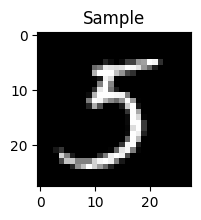

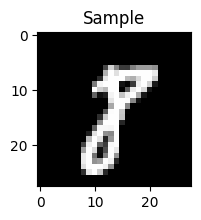

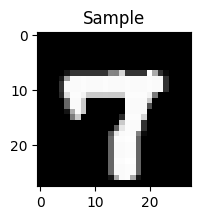

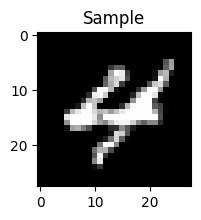

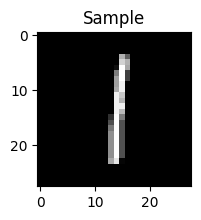

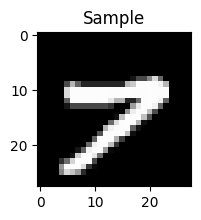

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display an image using Matplotlib
def imshow(title, image=None, size=6):
    """
    Display an image using Matplotlib.

    Parameters:
    - title: Title for the displayed image.
    - image: The image to be displayed.
    - size: Size of the displayed image.

    If the image is not provided, a message "Image not found" is printed.
    """
    if image is not None:
        # Get the width and height of the image
        w, h = image.shape[0], image.shape[1]
        aspect_ratio = w / h
        # Set the figure size based on the aspect ratio and specified size
        plt.figure(figsize=(size * aspect_ratio, size))
        # Display the image in RGB format using Matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.show()
    else:
        print("Image not found")

# Explanation:
# - The code defines a function called "imshow" to display images using Matplotlib.
# - This function takes three parameters: "title" for the displayed image title, "image" for the image to be displayed, and "size" for the size of the displayed image.
# - If the image is not provided (None), the function prints a message indicating that the image is not found.

# Displaying random samples from the training dataset
for i in range(0, 6):
    # Generate a random index within the range of the training dataset
    random_num = np.random.randint(0, len(x_train))
    # Retrieve the image corresponding to the random index
    img = x_train[random_num]
    # Call the imshow function to display the image with the specified title and size
    imshow("Sample", img, size=2)

# Explanation:
# - The loop iterates six times, each time selecting a random index from the training dataset (x_train).
# - It retrieves the corresponding image using the random index and then calls the "imshow" function to display the image.
# - The displayed image has the title "Sample" and a specified size of 2.
# - Comments within the code provide detailed explanations of the purpose and functionality of each section.


<Figure size 640x480 with 0 Axes>

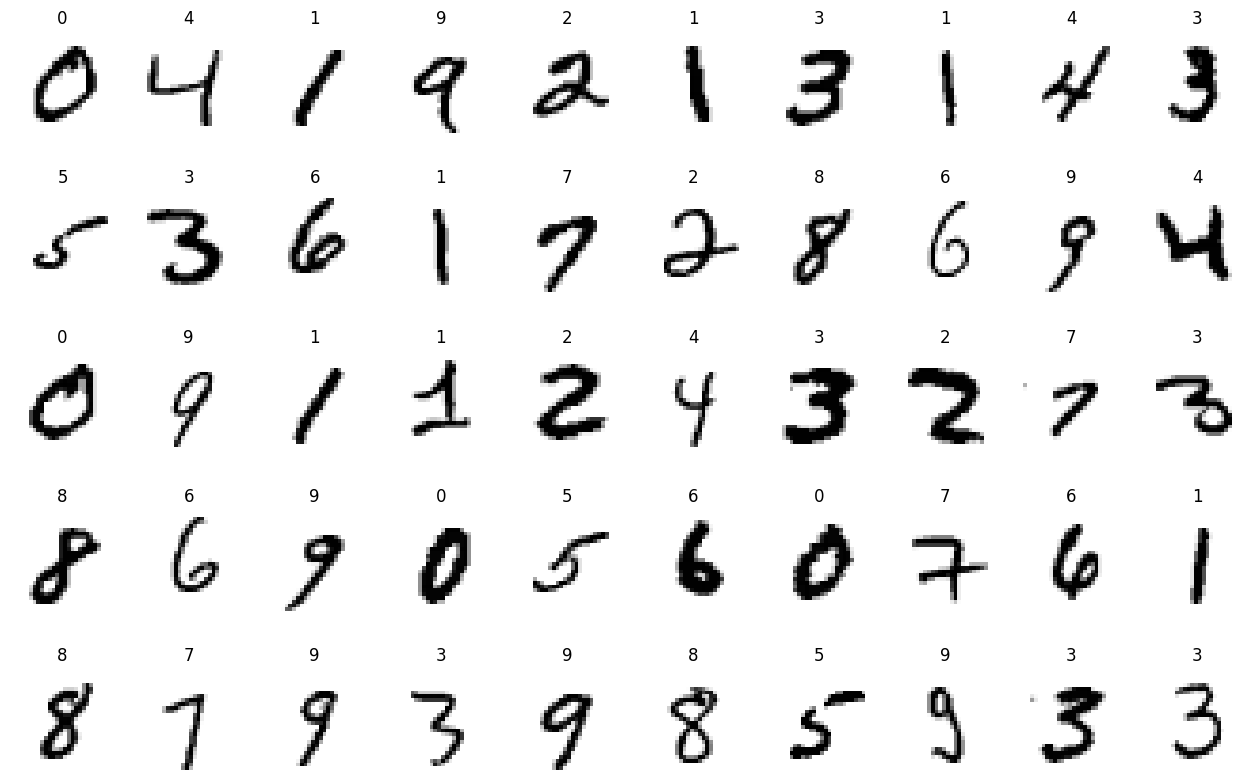

In [4]:
# Let's view the 50 first images of the MNIST training dataset
import matplotlib.pyplot as plt

# Create figure and change size
figure = plt.figure()
plt.figure(figsize=(16, 10))

# Explanation:
# - The code begins by creating a Matplotlib figure using plt.figure().
# - The figure size is set to 16x10 inches using plt.figure(figsize=(16, 10)).


num_of_images = 50

# Explanation:
# - The variable num_of_images is set to 50, indicating the number of images to be displayed.

# iterate index from 1 to 51
for index in range(1, num_of_images + 1):
    # Explanation:
    # - The loop iterates from 1 to 50, creating subplots for each image in a 5x10 grid.

    # Set the title of each subplot as the corresponding label from y_train
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    # Explanation:
    # - For each subplot, it sets the title as the corresponding label from y_train.

    # Turn off axis labels
    plt.axis('off')
    # Explanation:
    # - It turns off the axis labels for each subplot.

    # Display each image in grayscale using the 'gray_r' colormap
    plt.imshow(x_train[index], cmap='gray_r')
    # Explanation:
    # - Finally, it displays each image in grayscale using the 'gray_r' colormap.


In [5]:
# Let's store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Explanation:
# - The code initializes variables `img_rows` and `img_cols` to store the dimensions of the images in the MNIST dataset.

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimension to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Explanation:
# - The code reshapes the training and test datasets to include a fourth dimension, which is necessary for Keras.
# - It transforms the original image shape of (60000, 28, 28) to (60000, 28, 28, 1) by adding the fourth dimension.

# Store the shape of a single image
input_shape = (img_rows, img_cols, 1)

# Explanation:
# - The code stores the shape of a single image in the variable `input_shape`.

# Change our image type to float32 data type
x_train = x_train.astype('float32')  # uint8 originally
x_test = x_test.astype('float32')

# Explanation:
# - It changes the data type of the image arrays to float32.

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

# Explanation:
# - It normalizes the pixel values of the images by dividing them by 255.0, bringing the range from (0 to 255) to (0 to 1).

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
!pip install tensorflow

from tensorflow.keras.utils import to_categorical

# Explanation:
# - The code imports the `to_categorical` function from the `tensorflow.keras.utils` module.

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Explanation:
# - The code applies one-hot encoding to the labels in the training and test datasets using the `to_categorical` function.
# - This is a common preprocessing step for classification tasks, converting categorical labels into binary matrices.

# Let's count the number of columns in our one-hot encoded matrix
print("Number of Classes:", str(y_test.shape[1]))

# Explanation:
# - The code prints the number of classes, which is determined by the number of columns in the one-hot encoded matrix.

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# Explanation:
# - The code stores the number of classes and the total number of pixels in a single image in the variables `num_classes` and `num_pixels`, respectively.
# - `num_classes` is derived from the shape of the one-hot encoded matrix, specifically the number of columns.
# - `num_pixels` is calculated as the product of the width and height of the images in the training dataset.



Number of Classes: 10


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

# Explanation:
# - The code imports the necessary modules and classes from TensorFlow to define and compile a Convolutional Neural Network (CNN) model.

# Creating a Sequential model
model = Sequential()

# Explanation:
# - The `Sequential()` function is used to create a sequential model where layers are added in a linear stack.

# Adding Convolutional layers and Pooling layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Explanation:
# - Convolutional layers with ReLU activation are added to the model to extract features from the input images.
# - The first Conv2D layer takes input images with the specified shape (input_shape) and applies 32 filters.
# - The second Conv2D layer applies 64 filters.
# - MaxPooling2D is used to downsample the spatial dimensions of the output feature maps.

# Flattening the output for Dense layers
model.add(Flatten())

# Explanation:
# - The output from the convolutional layers is flattened to a one-dimensional array to be fed into Dense layers.

# Adding Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Explanation:
# - Dense layers are added for feature extraction and classification.
# - The first Dense layer consists of 128 neurons with ReLU activation.
# - The final Dense layer has neurons equal to the number of classes with softmax activation for classification.

# Compiling the model with categorical crossentropy loss and SGD optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.001),
              metrics=['accuracy'])

# Explanation:
# - The model is compiled with categorical crossentropy as the loss function, Stochastic Gradient Descent (SGD) as the optimizer,
#   and accuracy as the evaluation metric.

# Printing the model summary
print(model.summary())

# Explanation:
# - The `model.summary()` method prints a summary of the model architecture, including the number of parameters in each layer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [8]:
batch_size = 128
epochs = 25

# Explanation:
# - `batch_size` is set to 128, which is the number of samples processed in each iteration during training.
# - `epochs` is set to 25, indicating the number of times the entire training dataset is processed by the model.

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Explanation:
# - The `model.fit()` method is used to train the model.
# - It takes the training data (x_train, y_train) and validation data (x_test, y_test).
# - `batch_size` and `epochs` determine the number of samples processed in each iteration and the total number of training iterations, respectively.

score = model.evaluate(x_test, y_test, verbose=0)

# Explanation:
# - The `model.evaluate()` method is used to evaluate the model on the test dataset.
# - It returns the loss value and metric values (accuracy in this case).

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Explanation:
# - The code prints the test loss and accuracy obtained after evaluating the model on the test dataset.


Epoch 1/25
469/469 [==============================] - 223s 473ms/step - loss: 2.2518 - accuracy: 0.3111 - val_loss: 2.1815 - val_accuracy: 0.5004
Epoch 2/25
469/469 [==============================] - 247s 526ms/step - loss: 1.9814 - accuracy: 0.6186 - val_loss: 1.6037 - val_accuracy: 0.7391
Epoch 3/25
469/469 [==============================] - 263s 561ms/step - loss: 1.0636 - accuracy: 0.7876 - val_loss: 0.6496 - val_accuracy: 0.8470
Epoch 4/25
469/469 [==============================] - 205s 436ms/step - loss: 0.5440 - accuracy: 0.8576 - val_loss: 0.4381 - val_accuracy: 0.8847
Epoch 5/25
469/469 [==============================] - 202s 431ms/step - loss: 0.4215 - accuracy: 0.8824 - val_loss: 0.3720 - val_accuracy: 0.8973
Epoch 6/25
469/469 [==============================] - 207s 442ms/step - loss: 0.3716 - accuracy: 0.8940 - val_loss: 0.3357 - val_accuracy: 0.9057
Epoch 7/25
469/469 [==============================] - 217s 463ms/step - loss: 0.3428 - accuracy: 0.9017 - val_loss: 0.3128 -

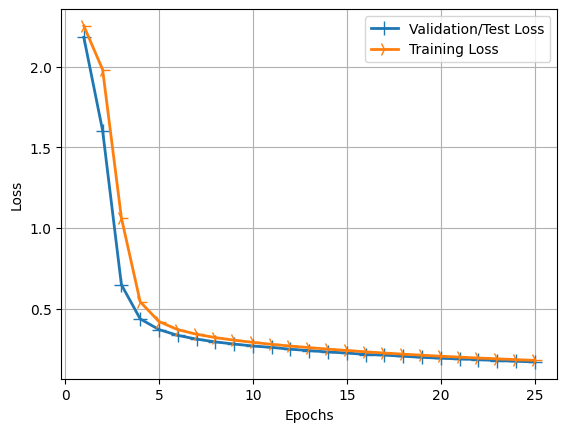

In [9]:
import matplotlib.pyplot as plt

# Explanation:
# - This code segment uses Matplotlib to plot the training and validation loss over epochs, visualizing the model's performance.

# Use the History object we created to get our saved performance results
history_dict = history.history

# Explanation:
# - The training history is stored in a dictionary during the model training process.

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Explanation:
# - The loss values for training and validation are extracted from the history dictionary.

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Explanation:
# - The range of epochs is created based on the length of the training loss values.

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Explanation:
# - The code uses Matplotlib to plot line charts for both validation/test loss and training loss over epochs.
# - Different markers and line styles are used for better visualization.
# - Axes labels, a grid, and a legend are added for clarity.
# - The resulting plot is displayed using plt.show().



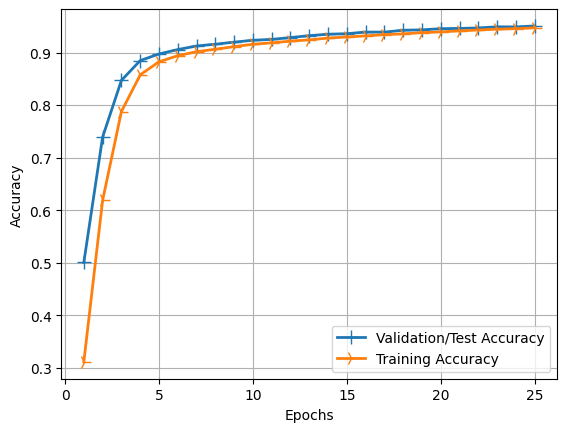

In [10]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

# Explanation:
# - This code segment uses Matplotlib to plot the training and validation accuracy over epochs.

history_dict = history.history

# Explanation:
# - The training history is stored in a dictionary during the model training process.

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

# Explanation:
# - The accuracy values for training and validation are extracted from the history dictionary.

# Plot line charts for both Validation and Training Accuracy
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Explanation:
# - The code uses Matplotlib to plot line charts for both validation/test accuracy and training accuracy over epochs.
# - Different markers and line styles are used for better visualization.
# - Axes labels, a grid, and a legend are added for clarity.
# - The resulting plot is displayed using plt.show().


In [11]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


**Keras Model Performance**

In [12]:
# Load keras model via load_model function
from tensorflow.keras.models import load_model
model=load_model('mnist_simple_cnn_10_Epochs.h5')
# Print a summary of the loaded model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


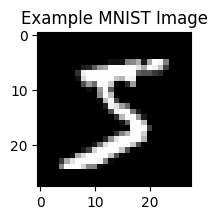

In [13]:
# Load MNIST dataset
from tensorflow.keras.datasets import mnist

# Use the mnist.load_data() function to load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

# Display an example image from the dataset
example_image = x_train[0]
imshow(title="Example MNIST Image", image=example_image, size=2)


In [14]:
# Get test predictions
print("Original shape of x_test:", x_test.shape)

# Reshape x_test to match the input shape expected by the model
x_test_reshaped = x_test.reshape(10000, 28, 28, 1)
print("Reshaped shape of x_test:", x_test_reshaped.shape)

# Get the predictions for all samples in the test data
import numpy as np

# Use the trained model to predict the class labels for each test sample
predictions = model.predict(x_test_reshaped)

# Extract the predicted class labels by selecting the index of the maximum value along the last axis
predicted_labels = np.argmax(predictions, axis=-1)

# Print the shape of the predictions
print("Shape of predictions:", predicted_labels.shape)

# Display a few predicted labels as an example
print("Example Predicted Labels:", predicted_labels[:10])



Original shape of x_test: (10000, 28, 28)
Reshaped shape of x_test: (10000, 28, 28, 1)
313/313 [==============================] - 8s 26ms/step
Shape of predictions: (10000,)
Example Predicted Labels: [7 2 1 0 4 1 4 9 6 9]


**Visualizing missclasified images**

In [15]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define a function for displaying images using Matplotlib
def imshow(title="", image=None, size=6):
    """
    Display an image using Matplotlib.

    Parameters:
    - title (str): Title for the plot.
    - image (numpy.ndarray): The image to be displayed.
    - size (int): Size of the plot.

    Returns:
    None
    """
    # Check if the image is provided
    if image is not None and image.any():
        # Get the width and height of the image
        w, h = image.shape[0], image.shape[1]

        # Calculate the aspect ratio of the image
        aspect_ratio = w / h

        # Set the size of the plot based on the aspect ratio and the specified size
        plt.figure(figsize=(size * aspect_ratio, size))

        # Convert the image from BGR to RGB for proper display with Matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Set the title of the plot
        plt.title(title)

        # Display the plot
        plt.show()
    else:
        # If the image is not provided, print a message
        print("Image not found")


**To plot misclassifications**

**Get confusion matrix**

In [18]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Reshape the test data to match the model's input shape
x_test = x_test.reshape(10000, 28, 28, 1)

# Use the trained model to predict class labels for the test data
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


313/313 [==============================] - 7s 22ms/step
[[ 969    0    1    1    0    3    3    1    2    0]
 [   0 1113    3    2    0    1    4    1   10    1]
 [   9    2  971   11    7    1    4    9   17    1]
 [   2    1    9  956    1    8    1    6   16   10]
 [   1    1    6    0  927    0    7    3    4   33]
 [  10    3    1   22    2  825   10    1   10    8]
 [  10    3    4    2    9    9  917    0    4    0]
 [   0    7   19    5    6    0    0  957    5   29]
 [   6    2    1   16    6    5    8    9  911   10]
 [  10    6    1   12   21    1    1    6    4  947]]


**Explanation:**

**Import Libraries:**

from sklearn.metrics import confusion_matrix: Import the confusion_matrix function from the scikit-learn library.
import numpy as np: Import NumPy for numerical operations.

**Reshape Test Data:**

x_test = x_test.reshape(10000, 28, 28, 1): Reshape the test data to match the input shape expected by the model. This step is necessary if the data was reshaped before for any other purposes.

**Get Model Predictions:**

y_pred = np.argmax(model.predict(x_test), axis=-1): Use the trained model to predict class labels for the reshaped test data. The np.argmax function is used to get the index of the maximum value along the last axis, which corresponds to the predicted class labels.

**Print Confusion Matrix:**

print(confusion_matrix(y_test, y_pred)): Calculate and print the confusion matrix using the true class labels (y_test) and the predicted class labels (y_pred). The confusion matrix provides a summary of the model's performance by showing the number of true positive, true negative, false positive, and false negative predictions for each class.

In [19]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes such as [0, 1, 2]
                  The class names, for example: ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    import matplotlib.pyplot as plt
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    # Set default colormap to 'Blues' if not provided
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    # Create a figure with specified size
    plt.figure(figsize=(8, 6))

    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # Set axis labels based on target_names
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    # Normalize the confusion matrix if specified
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Determine the threshold for text color
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2

    # Display the values in each cell of the matrix
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    # Adjust layout and set axis labels
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

    # Show the plot
    plt.show()


**Explanation:**

import matplotlib.pyplot as plt: Import the matplotlib.pyplot module as plt for creating visualizations.

**import itertools:** Import the itertools module for efficient looping.

**Function Parameters:**

cm: Confusion matrix from sklearn's confusion_matrix.
target_names: List of class names.
title: Title for the confusion matrix plot.
cmap: Colormap for the plot. Default is 'Blues'.
normalize: If True, plot proportions; if False, plot raw numbers.
Calculate Accuracy and Misclassification Rate:

accuracy = np.trace(cm) / np.sum(cm).astype('float'): Calculate accuracy.
misclass = 1 - accuracy: Calculate misclassification rate.
Default Colormap:

if cmap is None: cmap = plt.get_cmap('Blues'): Set default colormap to 'Blues' if not provided.
Create Figure:

plt.figure(figsize=(8, 6)): Create a figure with a specified size.
Plot Confusion Matrix:

plt.imshow(cm, interpolation='nearest', cmap=cmap): Plot the confusion matrix.
Set Axis Labels:

Set axis labels based on target_names if provided.
Normalize the Confusion Matrix:

if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]: Normalize the confusion matrix if specified.
Determine Text Color Threshold:

thresh = cm.max() / 1.5 if normalize else cm.max() / 2: Determine the threshold for text color.
Display Values in Each Cell:

Use nested loops to display values in each cell of the matrix.
Adjust Layout and Set Axis Labels:

plt.tight_layout(): Adjust layout.
Set ylabel and xlabel based on accuracy and misclassification rate.
Show the Plot:

plt.show(): Display the plot.

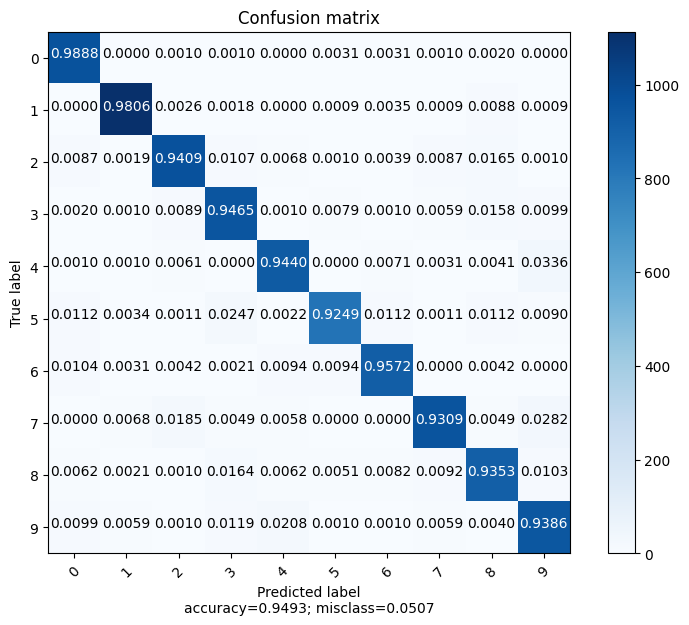

In [20]:
# Define target_names as a list of class labels (assuming classes are integers from 0 to 9)
target_names = list(range(0, 10))

# Calculate the confusion matrix using sklearn's confusion_matrix function
conf_mat = confusion_matrix(y_test, y_pred)

# Call the plot_confusion_matrix function to visualize the confusion matrix
plot_confusion_matrix(conf_mat, target_names)


**Identify per-class accuracy**

In [21]:
# Calculate per-class accuracy as a percentage
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

# Loop through each class and print its accuracy
for (i, ca) in enumerate(class_accuracy):
    print(f'Accuracy for class {i}: {ca:.3f}%')


Accuracy for class 0: 98.878%
Accuracy for class 1: 98.062%
Accuracy for class 2: 94.089%
Accuracy for class 3: 94.653%
Accuracy for class 4: 94.399%
Accuracy for class 5: 92.489%
Accuracy for class 6: 95.720%
Accuracy for class 7: 93.093%
Accuracy for class 8: 93.532%
Accuracy for class 9: 93.855%


**Explanation:**


class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1): Calculate the per-class accuracy by dividing the diagonal elements of the confusion matrix (conf_mat.diagonal()) by the sum of each row in the confusion matrix (conf_mat.sum(1)). Multiply by 100 to convert to a percentage.

for (i, ca) in enumerate(class_accuracy):: Use enumerate to loop through each element in the class_accuracy array along with its corresponding index (i).

print(f'Accuracy for class {i}: {ca:.3f}%'): Print the accuracy for each class with three decimal places. The f-string formatting is used to include the class index (i) and the corresponding accuracy (ca).

**Get classification report**

In [22]:
from sklearn.metrics import classification_report

# Use sklearn's classification_report to generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.97      0.92      0.95       892
           6       0.96      0.96      0.96       958
           7       0.96      0.93      0.95      1028
           8       0.93      0.94      0.93       974
           9       0.91      0.94      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

